In [2]:
#import necessary librairies

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
data = air_quality.data.features

 ### **Dataset Overview**

In [5]:
# Display basic information about the dataset
# metadata
print(air_quality.metadata)

# variable information
print(air_quality.variables)

{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'ID': 420, 'type': 'NATIVE', 'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 

In [6]:
# Display the shape of the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (9357, 15)


In [7]:
# Display the first few rows
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [8]:
# Check for unique values in each column
print(data.nunique())

# Look for the placeholder (-200) across the dataset because in the dataset documentation  Missing values are tagged with -200 value.

print("\nMissing values per column:\n",(data == -200).sum())  # Count occurrences of -200 per column


Date              391
Time               24
CO(GT)             97
PT08.S1(CO)      1042
NMHC(GT)          430
C6H6(GT)          408
PT08.S2(NMHC)    1246
NOx(GT)           926
PT08.S3(NOx)     1222
NO2(GT)           284
PT08.S4(NO2)     1604
PT08.S5(O3)      1744
T                 437
RH                754
AH               6684
dtype: int64

Missing values per column:
 Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


*Replace Missing Value Placeholder*

Replace -200 with NaN to allow for Pandas' handling of missing data.

In [9]:
# Replace -200 with NaN
data.replace(-200, np.nan, inplace=True)

# Verify missing values
print(data.isna().sum())


Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [10]:
# Drop rows with any missing values
data_cleaned = data.dropna()
print("Shape after dropping rows with missing values:", data_cleaned.shape)

print(data_cleaned.isna().sum())


Shape after dropping rows with missing values: (827, 15)
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


### **Visualization of Original Data Features**

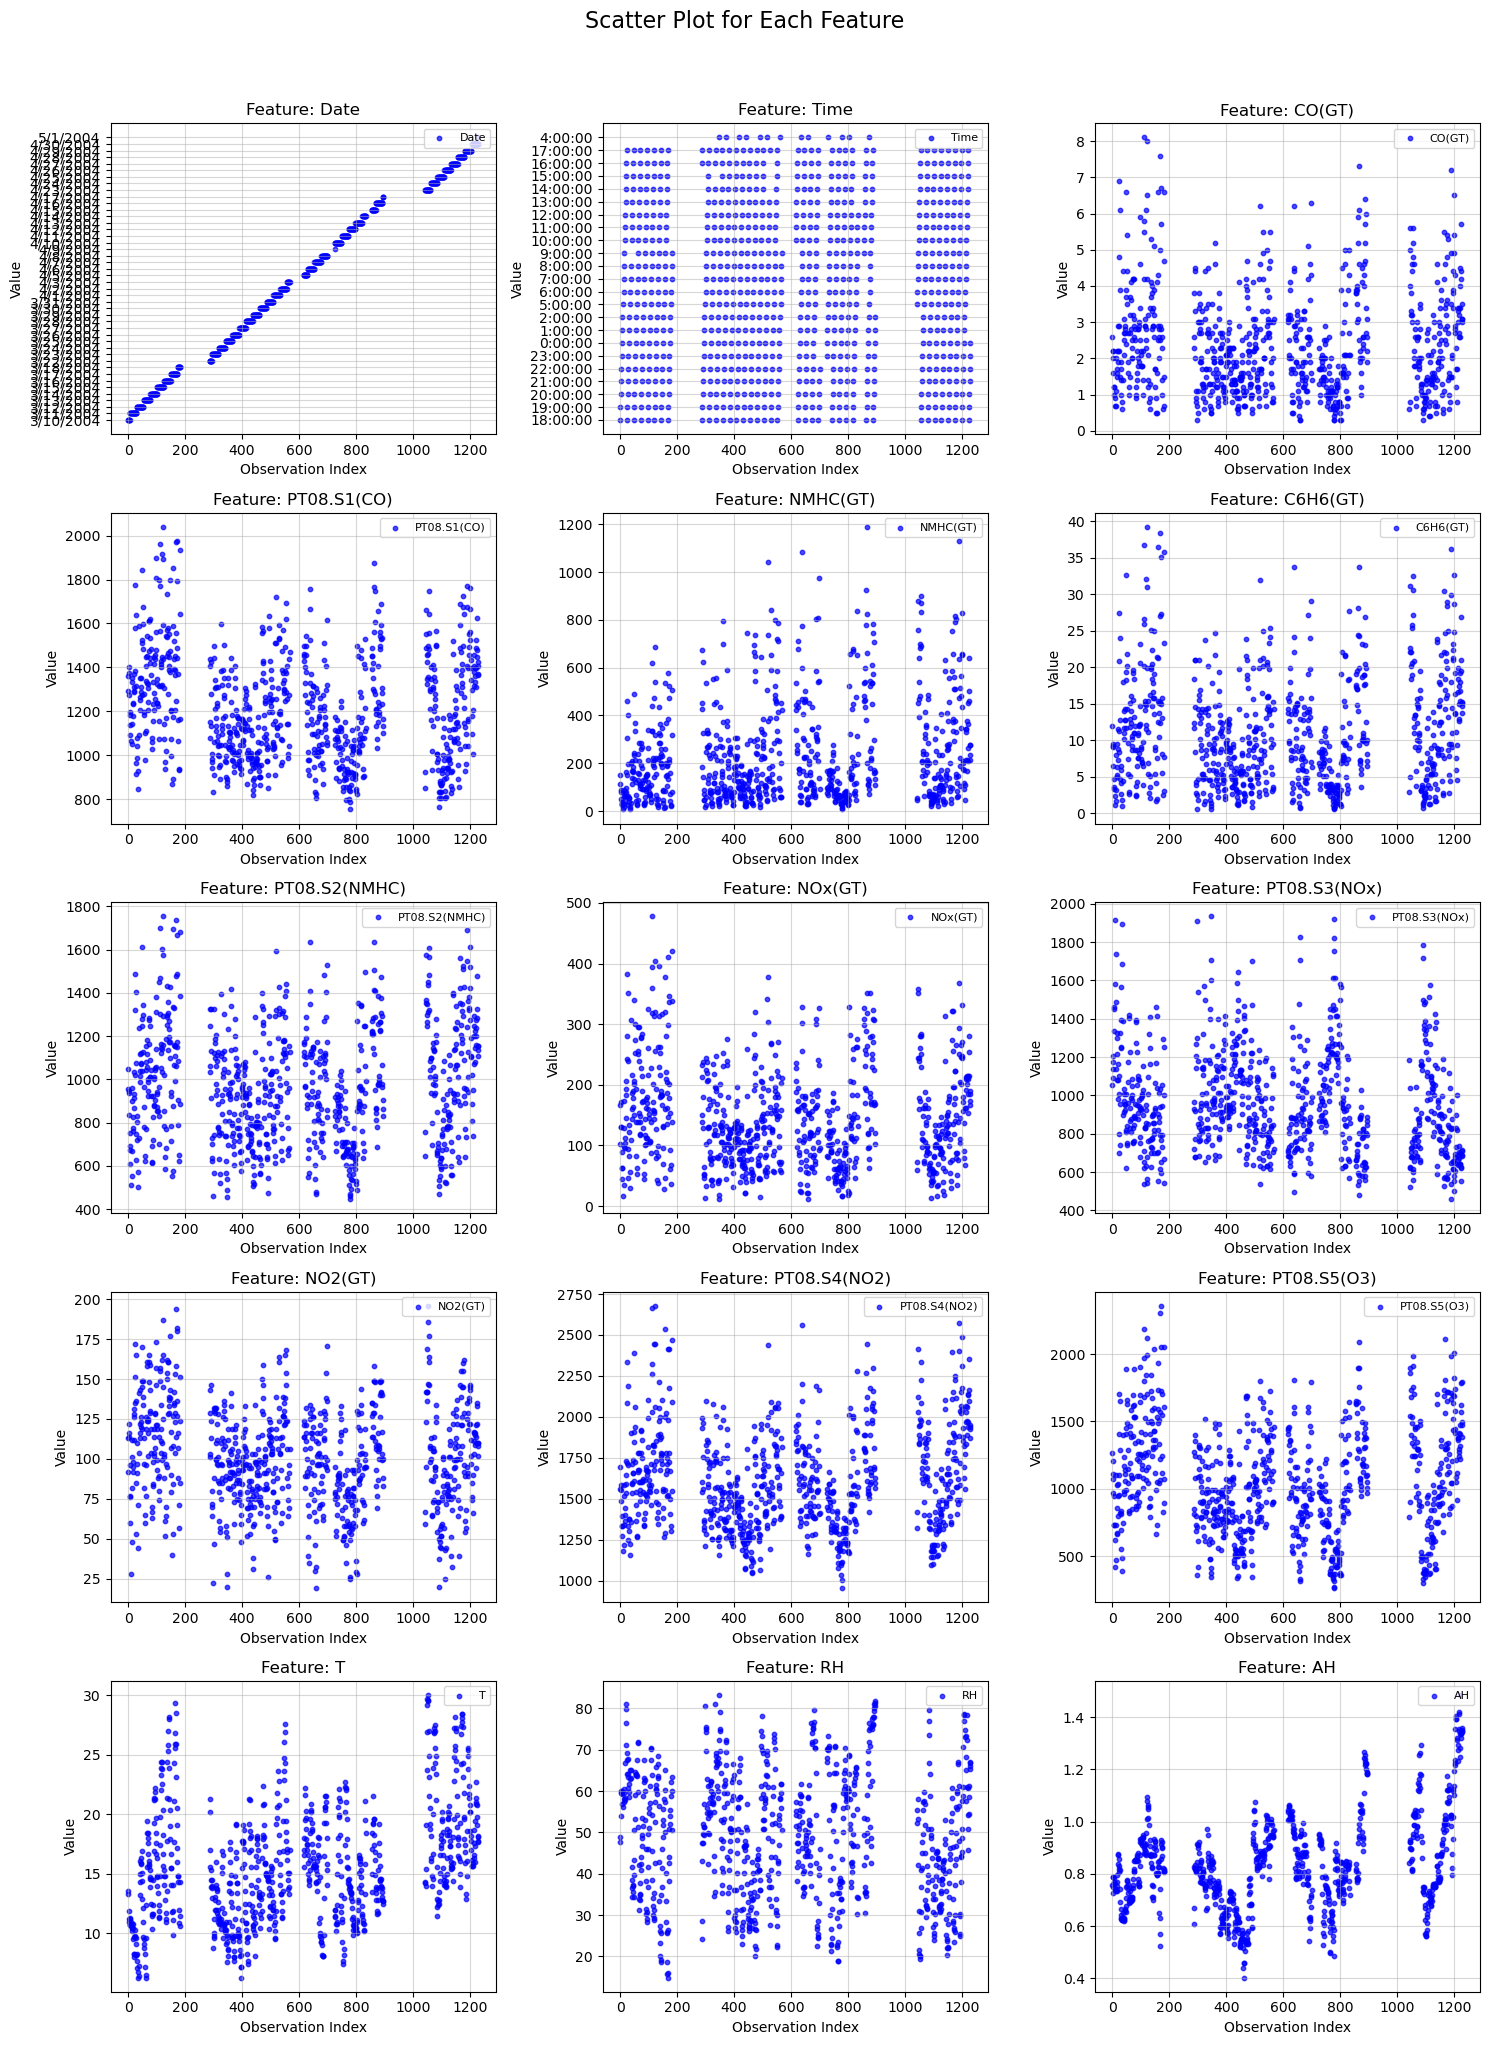

In [11]:

# Define the number of rows and columns for the subplot grid
num_features = len(data_cleaned.columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create the figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate through

# Plot each feature in its respective subplot
for idx, column in enumerate(data_cleaned.columns):
    axes[idx].scatter(data_cleaned.index, data_cleaned[column], alpha=0.7, s=10, color='blue', label=column)
    axes[idx].set_title(f"Feature: {column}", fontsize=12)
    axes[idx].set_xlabel("Observation Index")
    axes[idx].set_ylabel("Value")
    axes[idx].grid(alpha=0.5)
    axes[idx].legend(loc="upper right", fontsize=8)

# Turn off unused subplots if the grid is larger than the number of features
for ax in axes[num_features:]:
    ax.axis('off')

# Add a main title and adjust layout
plt.suptitle("Scatter Plot for Each Feature", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### **Summary Statistics and Standard Deviation**

In [12]:
data_cleaned.shape

(827, 15)

In [13]:
# Generate summary statistics
stats = data_cleaned.describe()
print(stats)

# Check standard deviation for each variable
std_devs = stats.loc['std']
print("\nStandard deviations:\n", std_devs)

# Highlight variables with high standard deviation
threshold = 10  # Define a threshold (arbitrary, can be adjusted)
high_std = std_devs[std_devs > threshold]
print("\nVariables with high standard deviation:\n", high_std)


           CO(GT)  PT08.S1(CO)     NMHC(GT)    C6H6(GT)  PT08.S2(NMHC)  \
count  827.000000   827.000000   827.000000  827.000000     827.000000   
mean     2.353567  1207.879081   231.025393   10.771100     966.116082   
std      1.409496   241.816997   208.461912    7.418134     266.424557   
min      0.300000   753.000000     7.000000    0.500000     448.000000   
25%      1.300000  1017.000000    77.000000    4.800000     754.000000   
50%      2.000000  1172.000000   157.000000    9.100000     944.000000   
75%      3.100000  1380.000000   318.500000   14.800000    1142.500000   
max      8.100000  2040.000000  1189.000000   39.200000    1754.000000   

          NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  827.000000    827.000000  827.000000    827.000000   827.000000   
mean   143.501814    963.297461  100.259976   1600.620314  1045.812576   
std     81.829717    265.914168   31.493823    302.291793   400.134662   
min     12.000000    461.000000   19.

**Analysis of Magnitude and Range**

To analyze units and magnitude we will compare the ranges (min and max values) of variables.


In [14]:
# Display range of each variable
ranges = stats.loc['max'] - stats.loc['min']
print("Ranges of variables:\n", ranges)

# Identify variables with large magnitude differences
large_magnitude = ranges[ranges > 1000]  # Example threshold
print("Variables with large magnitude differences:\n", large_magnitude)


Ranges of variables:
 CO(GT)              7.8000
PT08.S1(CO)      1287.0000
NMHC(GT)         1182.0000
C6H6(GT)           38.7000
PT08.S2(NMHC)    1306.0000
NOx(GT)           466.0000
PT08.S3(NOx)     1474.0000
NO2(GT)           177.0000
PT08.S4(NO2)     1724.0000
PT08.S5(O3)      2096.0000
T                  23.7000
RH                 68.3000
AH                  1.0829
dtype: float64
Variables with large magnitude differences:
 PT08.S1(CO)      1287.0
NMHC(GT)         1182.0
PT08.S2(NMHC)    1306.0
PT08.S3(NOx)     1474.0
PT08.S4(NO2)     1724.0
PT08.S5(O3)      2096.0
dtype: float64


 ### **Data Cleaning and Reducing the Dataset**

In [15]:
# Drop columns such as 'Date', 'Time' since they are not interesting for our study
columns_to_drop = ['Date', 'Time']
data_cleaned = data_cleaned.drop(columns=columns_to_drop)

# Verify the reduced dataset
print("Remaining columns:\n", data_cleaned.columns)
print("Shape after dropping unecessary columns:", data_cleaned.shape)


Remaining columns:
 Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')
Shape after dropping unecessary columns: (827, 13)


## **Principal Component Analysis (PCA): A Data-Driven Exploration**

### **Standardizing the Data**

To perform PCA effectively, the data must be standardized:

- *Centered*: Mean of each feature is 0.
- *Reduced*: Standard deviation of each feature is 1.

Standardization ensures all features contribute equally to the PCA, regardless of their original scale.

In [16]:
# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_cleaned)

# Convert back to a DataFrame for easier handling
data_standardized = pd.DataFrame(data_standardized, columns=data_cleaned.columns)

# Verify the standardization
print("Mean of each column after standardization:\n", data_standardized.mean())
print("Standard deviation of each column after standardization:\n", data_standardized.std())

Mean of each column after standardization:
 CO(GT)           6.873448e-17
PT08.S1(CO)     -2.062035e-16
NMHC(GT)         5.155086e-17
C6H6(GT)         8.591811e-17
PT08.S2(NMHC)    6.873448e-17
NOx(GT)         -1.718362e-17
PT08.S3(NOx)    -3.436724e-17
NO2(GT)          1.890198e-16
PT08.S4(NO2)    -3.608560e-16
PT08.S5(O3)      5.155086e-17
T               -3.952233e-16
RH              -2.019075e-16
AH              -1.031017e-16
dtype: float64
Standard deviation of each column after standardization:
 CO(GT)           1.000605
PT08.S1(CO)      1.000605
NMHC(GT)         1.000605
C6H6(GT)         1.000605
PT08.S2(NMHC)    1.000605
NOx(GT)          1.000605
PT08.S3(NOx)     1.000605
NO2(GT)          1.000605
PT08.S4(NO2)     1.000605
PT08.S5(O3)      1.000605
T                1.000605
RH               1.000605
AH               1.000605
dtype: float64


### **Analyzing the Correlation Matrix**

In [17]:
# Calculate the correlation matrix
correlation_matrix = data_standardized.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.936261  0.887167  0.972660       0.958426   
PT08.S1(CO)    0.936261     1.000000  0.781747  0.931368       0.936346   
NMHC(GT)       0.887167     0.781747  1.000000  0.897928       0.875061   
C6H6(GT)       0.972660     0.931368  0.897928  1.000000       0.984834   
PT08.S2(NMHC)  0.958426     0.936346  0.875061  0.984834       1.000000   
NOx(GT)        0.951342     0.922885  0.811182  0.927304       0.926633   
PT08.S3(NOx)  -0.823728    -0.829577 -0.774237 -0.848850      -0.910651   
NO2(GT)        0.861432     0.866579  0.728052  0.846743       0.885023   
PT08.S4(NO2)   0.939921     0.945020  0.848489  0.960811       0.957883   
PT08.S5(O3)    0.882943     0.935011  0.761905  0.896978       0.909100   
T              0.318261     0.324815  0.366976  0.418409       0.445615   
RH            -0.105157    -0.039570 -0.160257 -0.178410      -0.193333   
AH  

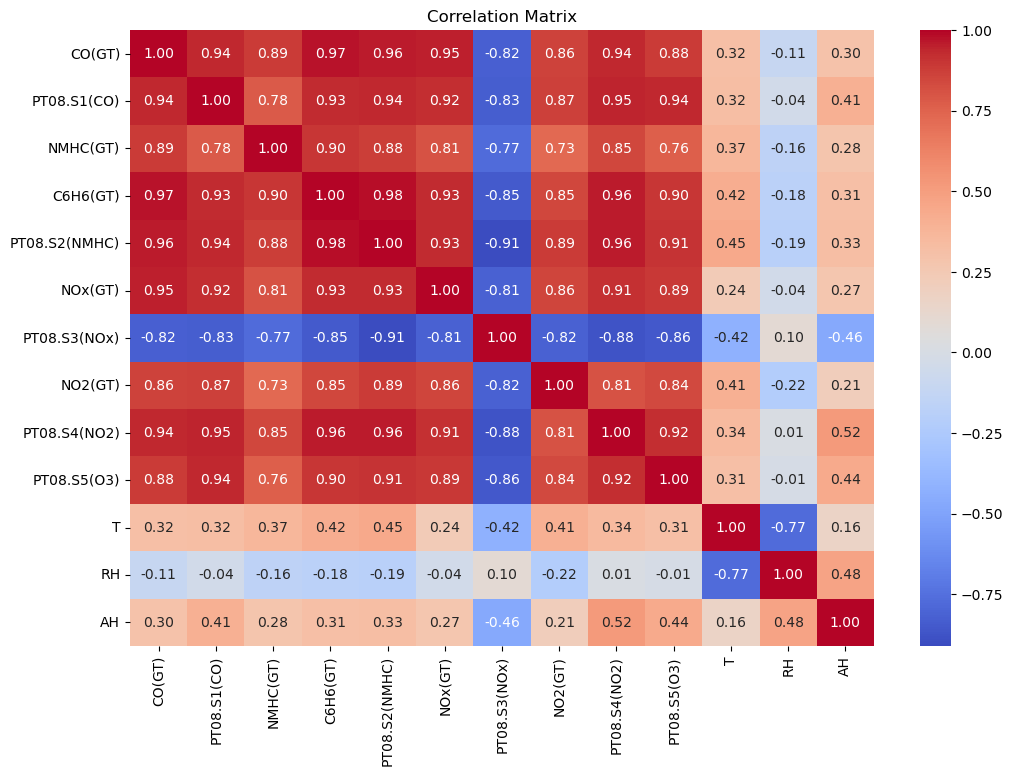

In [18]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### **Eigenvectors and Eigenvalues**

We'll calculate the covariance matrix (since the data is already standardized), and then compute its eigenvalues and eigenvectors.

In [19]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Sort eigenvalues in descending order and adjust eigenvectors accordingly
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices of sorted eigenvalues
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [20]:
# Display eigenvalues
print("Eigenvalues (sorted in descending order):")
for idx, value in enumerate(eigenvalues):
    print(f"Eigenvalue {idx + 1}: {value:.4f}")

Eigenvalues (sorted in descending order):
Eigenvalue 1: 9.2841
Eigenvalue 2: 1.8747
Eigenvalue 3: 0.9368
Eigenvalue 4: 0.3291
Eigenvalue 5: 0.1978
Eigenvalue 6: 0.1358
Eigenvalue 7: 0.0917
Eigenvalue 8: 0.0610
Eigenvalue 9: 0.0370
Eigenvalue 10: 0.0244
Eigenvalue 11: 0.0162
Eigenvalue 12: 0.0082
Eigenvalue 13: 0.0031


In [21]:
# Display eigenvectors
print("\nEigenvectors (corresponding to sorted eigenvalues):")
eigenvector_df = pd.DataFrame(eigenvectors, columns=[f"eigenvector{i+1}" for i in range(len(eigenvalues))])
print(eigenvector_df.to_string(index=False))


Eigenvectors (corresponding to sorted eigenvalues):
 eigenvector1  eigenvector2  eigenvector3  eigenvector4  eigenvector5  eigenvector6  eigenvector7  eigenvector8  eigenvector9  eigenvector10  eigenvector11  eigenvector12  eigenvector13
    -0.317441     -0.015494      0.169786      0.150321     -0.175787     -0.128066     -0.220198     -0.000828     -0.082665      -0.777031      -0.288059      -0.221149       0.096341
    -0.314619     -0.070293      0.050415     -0.208867     -0.365538      0.032478      0.034844     -0.354231     -0.719607       0.236402      -0.057617       0.069478      -0.081682
    -0.289528      0.037604      0.081759      0.721034      0.240506     -0.318720      0.391426      0.076852     -0.183868       0.183261       0.025355      -0.025585       0.030811
    -0.321400      0.036300      0.079855      0.193952     -0.168148      0.105849     -0.117698     -0.223385      0.399582       0.008088      -0.032986       0.431642      -0.633265
    -0.324512    

### **matrix of new principal components 𝐹 and the saturation matrix 𝑆**

### **matrix of new principal components 𝐹**

This matrix transforms the standardized data (𝑋𝑠) into the new principal component space using the eigenvectors (𝑈).


In [22]:
F = np.dot(data_standardized, eigenvectors)

# Print the matrix and its shape
print("\nMatrix of New Components (F):")
print(F)
print("Shape of F:", F.shape)



Matrix of New Components (F):
[[-0.54174447 -0.13867461  0.74125374 ...  0.12608438 -0.02114283
   0.16177386]
 [ 0.91921712  0.06340299  0.59508025 ...  0.08334988  0.05898369
   0.17491756]
 [ 0.41793368 -0.46878215  0.84580168 ...  0.05007336  0.04385043
   0.08626369]
 ...
 [-2.23162015 -2.00595301 -2.3887137  ...  0.08105526  0.1145221
   0.07953156]
 [-2.15905279 -1.99634366 -2.2148144  ...  0.02333213  0.11580002
   0.07302446]
 [-2.88021324 -2.10769174 -2.12580534 ... -0.06278087  0.04004995
   0.14555869]]
Shape of F: (827, 13)


### **The saturation matrix 𝑆**

In [42]:
# Diagonal matrix of all eigenvalues (D)
D = np.diag(eigenvalues)  # Ensure eigenvalues are used for all components

# Compute the square root of the diagonal matrix of eigenvalues
# sqrt_D = np.sqrt(D)
sqrt_D = np.diag(np.sqrt(eigenvalues))

# Compute the saturation matrix (S)
S = np.dot(eigenvectors, sqrt_D)

# Print the saturation matrix and its shape
print("\nSaturation Matrix (S):")
print(S)
print("Shape of S:", S.shape)



Saturation Matrix (S):
[[-9.67239547e-01 -2.12145524e-02  1.64330976e-01  8.62360957e-02
  -7.81878161e-02 -4.71875360e-02 -6.66628857e-02 -2.04500646e-04
  -1.59099187e-02 -1.21422885e-01 -3.66827541e-02 -2.00262348e-02
   5.38242687e-03]
 [-9.58640091e-01 -9.62454327e-02  4.87949343e-02 -1.19823116e-01
  -1.62587229e-01  1.19670375e-02  1.05486763e-02 -8.75100624e-02
  -1.38497121e-01  3.69414323e-02 -7.33718730e-03  6.29159292e-03
  -4.56345241e-03]
 [-8.82188900e-01  5.14876652e-02  7.91317010e-02  4.13643726e-01
   1.06974266e-01 -1.17436483e-01  1.18500626e-01  1.89856003e-02
  -3.53875659e-02  2.86373467e-02  3.22878895e-03 -2.31685333e-03
   1.72136817e-03]
 [-9.79302302e-01  4.97018436e-02  7.72895233e-02  1.11266400e-01
  -7.47903198e-02  3.90014911e-02 -3.56319007e-02 -5.51853716e-02
   7.69044429e-02  1.26383125e-03 -4.20062321e-03  3.90875382e-02
  -3.53794942e-02]
 [-9.88785278e-01  6.46878688e-02  4.27461290e-02  1.76579969e-02
   3.42853781e-02  5.54890782e-02 -5.41662

In [43]:
# Convert F to a DataFrame
F_df = pd.DataFrame(F, columns=[f"PC{i+1}" for i in range(F.shape[1])])

# Print F as a DataFrame
print("\nMatrix of New Components (F):")
print(F_df.head())  # Print only the first few rows for readability
print("Shape of F:", F_df.shape)



Matrix of New Components (F):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.541744 -0.138675  0.741254 -0.660802 -0.591708  0.121084  0.154914   
1  0.919217  0.063403  0.595080 -0.260104 -0.625393  0.147484  0.064573   
2  0.417934 -0.468782  0.845802 -0.890946 -0.615082 -0.247292  0.115382   
3  0.046104 -0.975554  0.920227 -1.151296 -0.492339 -0.273796  0.134145   
4  1.111138 -0.863837  0.676810 -1.083006 -0.494755 -0.466568  0.361117   

        PC8       PC9      PC10      PC11      PC12      PC13  
0 -0.242754  0.047445  0.077624  0.126084 -0.021143  0.161774  
1 -0.612319 -0.129360  0.113231  0.083350  0.058984  0.174918  
2 -0.535517 -0.324041  0.153269  0.050073  0.043850  0.086264  
3 -0.111788 -0.128014  0.224935  0.060449  0.043802  0.067028  
4 -0.142549 -0.024121  0.252233  0.104855 -0.016016  0.058125  
Shape of F: (827, 13)


In [44]:
# Convert S to a DataFrame
S_df = pd.DataFrame(S, columns=[f"Axis{i+1}" for i in range(S.shape[1])], index=data_cleaned.columns)

# Print S as a DataFrame
print("\nSaturation Matrix (S):")
print(S_df)
print("Shape of S:", S_df.shape)


Saturation Matrix (S):
                  Axis1     Axis2     Axis3     Axis4     Axis5     Axis6  \
CO(GT)        -0.967240 -0.021215  0.164331  0.086236 -0.078188 -0.047188   
PT08.S1(CO)   -0.958640 -0.096245  0.048795 -0.119823 -0.162587  0.011967   
NMHC(GT)      -0.882189  0.051488  0.079132  0.413644  0.106974 -0.117436   
C6H6(GT)      -0.979302  0.049702  0.077290  0.111266 -0.074790  0.039001   
PT08.S2(NMHC) -0.988785  0.064688  0.042746  0.017658  0.034285  0.055489   
NOx(GT)       -0.941527 -0.081284  0.224682 -0.045116 -0.067651  0.016925   
PT08.S3(NOx)   0.911150  0.029260  0.145000  0.079917 -0.344442 -0.135614   
NO2(GT)       -0.896486  0.120188  0.121519 -0.290861  0.100074 -0.264906   
PT08.S4(NO2)  -0.972319 -0.150157 -0.057779  0.063173 -0.065056  0.066032   
PT08.S5(O3)   -0.939514 -0.125253 -0.001094 -0.161316 -0.055475  0.119493   
T             -0.430411  0.714719 -0.539887 -0.003631 -0.065730 -0.027755   
RH             0.134668 -0.984802  0.027754  0.00503

### **Choice of Factorial Axes and Computation of Overall Quality of Explanation**

Principal Component 1: Explained Variance = 0.7142, Cumulative Variance = 0.7142
Principal Component 2: Explained Variance = 0.1442, Cumulative Variance = 0.8584
Principal Component 3: Explained Variance = 0.0721, Cumulative Variance = 0.9304
Principal Component 4: Explained Variance = 0.0253, Cumulative Variance = 0.9557
Principal Component 5: Explained Variance = 0.0152, Cumulative Variance = 0.9710
Principal Component 6: Explained Variance = 0.0104, Cumulative Variance = 0.9814
Principal Component 7: Explained Variance = 0.0071, Cumulative Variance = 0.9885
Principal Component 8: Explained Variance = 0.0047, Cumulative Variance = 0.9932
Principal Component 9: Explained Variance = 0.0028, Cumulative Variance = 0.9960
Principal Component 10: Explained Variance = 0.0019, Cumulative Variance = 0.9979
Principal Component 11: Explained Variance = 0.0012, Cumulative Variance = 0.9991
Principal Component 12: Explained Variance = 0.0006, Cumulative Variance = 0.9998
Principal Component 13: E

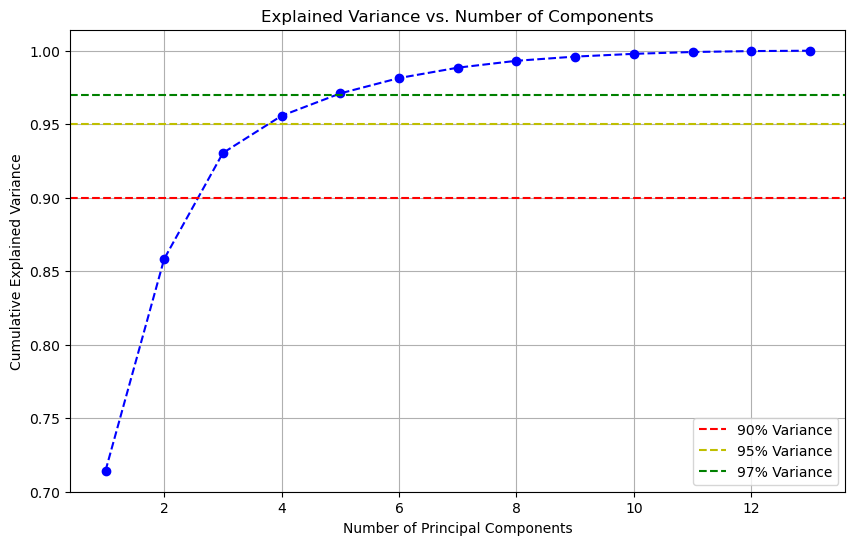

In [45]:
# Calculate the total variance
total_variance = np.sum(eigenvalues)

# Calculate the explained variance ratio for each component
explained_variance_ratio = eigenvalues / total_variance

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Display explained variance and cumulative explained variance
for i, (var, cum_var) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    print(f"Principal Component {i+1}: Explained Variance = {var:.4f}, Cumulative Variance = {cum_var:.4f}")

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='y', linestyle='--', label='95% Variance')
plt.axhline(y=0.97, color='g', linestyle='--', label='97% Variance')
plt.legend()
plt.grid()
plt.show()


now from the above graph and results we deduce that explaining 97% is good

In [46]:
# Find the number of components to explain at least 97% of the variance (overall quality of explanation of 98%)
oqe = 0.97
num_components = np.argmax(cumulative_explained_variance >= oqe) + 1  # Add 1 because index starts at 0

# Calculate information loss
information_loss = 1 - cumulative_explained_variance[num_components - 1]
information_loss_percentage = information_loss * 100

# Print results
print(f"Number of components to retain for 97% of information: {num_components}")
print(f"Explained variance with {num_components} components: {cumulative_explained_variance[num_components - 1]:.4f}")
print(f"Information loss: {information_loss:.4f} ({information_loss_percentage:.2f}%)")


Number of components to retain for 97% of information: 5
Explained variance with 5 components: 0.9710
Information loss: 0.0290 (2.90%)


## **Analysis of Correlation Circles and Saturation Matrix**

### **Visualize the original dataset and the transformed dataset in the reduced space**

**Correlation Circles**

In [28]:
# Select only the first 5 components from the matrix of new components (F)
F_chosen = F[:, :5]  # Select first 5 components

# Convert to DataFrame for readability
F_chosen_df = pd.DataFrame(F_chosen, columns=[f"PC{i+1}" for i in range(5)], index=data_cleaned.index)

# Print the matrix of new components for the chosen principal components
print("\nMatrix of New Components (F) for the 5 Chosen Principal Components:")
print(F_chosen_df)
print("Shape of F (chosen components):", F_chosen_df.shape)



Matrix of New Components (F) for the 5 Chosen Principal Components:
           PC1       PC2       PC3       PC4       PC5
0    -0.541744 -0.138675  0.741254 -0.660802 -0.591708
1     0.919217  0.063403  0.595080 -0.260104 -0.625393
2     0.417934 -0.468782  0.845802 -0.890946 -0.615082
3     0.046104 -0.975554  0.920227 -1.151296 -0.492339
4     1.111138 -0.863837  0.676810 -1.083006 -0.494755
...        ...       ...       ...       ...       ...
1226 -4.389431 -1.606254 -1.761228  0.318724 -0.136507
1227 -2.497678 -1.943340 -2.286967 -0.330766 -0.178518
1228 -2.231620 -2.005953 -2.388714 -0.283812 -0.218851
1229 -2.159053 -1.996344 -2.214814 -0.148101 -0.151275
1230 -2.880213 -2.107692 -2.125805 -0.392150 -0.405689

[827 rows x 5 columns]
Shape of F (chosen components): (827, 5)


In [29]:
F_chosen_df.to_csv('F.csv', index=False)

In [30]:
# Select only the first 5 components from the saturation matrix (S)
S_chosen = S[:, :5]  # Select first 5 components

# Convert to DataFrame for readability
S_chosen_df = pd.DataFrame(S_chosen, columns=[f"Axis{i+1}" for i in range(5)], index=data_cleaned.columns)

# Print the saturation matrix for the chosen components
print("\nSaturation Matrix for the 5 Chosen Principal Components (S):")
print(S_chosen_df)
print("Shape of S (chosen components):", S_chosen_df.shape)



Saturation Matrix for the 5 Chosen Principal Components (S):
                  Axis1     Axis2     Axis3     Axis4     Axis5
CO(GT)        -0.967240 -0.021215  0.164331  0.086236 -0.078188
PT08.S1(CO)   -0.958640 -0.096245  0.048795 -0.119823 -0.162587
NMHC(GT)      -0.882189  0.051488  0.079132  0.413644  0.106974
C6H6(GT)      -0.979302  0.049702  0.077290  0.111266 -0.074790
PT08.S2(NMHC) -0.988785  0.064688  0.042746  0.017658  0.034285
NOx(GT)       -0.941527 -0.081284  0.224682 -0.045116 -0.067651
PT08.S3(NOx)   0.911150  0.029260  0.145000  0.079917 -0.344442
NO2(GT)       -0.896486  0.120188  0.121519 -0.290861  0.100074
PT08.S4(NO2)  -0.972319 -0.150157 -0.057779  0.063173 -0.065056
PT08.S5(O3)   -0.939514 -0.125253 -0.001094 -0.161316 -0.055475
T             -0.430411  0.714719 -0.539887 -0.003631 -0.065730
RH             0.134668 -0.984802  0.027754  0.005039  0.022137
AH            -0.403459 -0.561135 -0.715165  0.021175 -0.041521
Shape of S (chosen components): (13, 5)


Threshold for PC1 (70th Percentile): 0.962
Threshold for PC2 (70th Percentile): 0.135
Threshold for PC3 (70th Percentile): 0.153
Threshold for PC4 (70th Percentile): 0.115
Threshold for PC5 (70th Percentile): 0.087


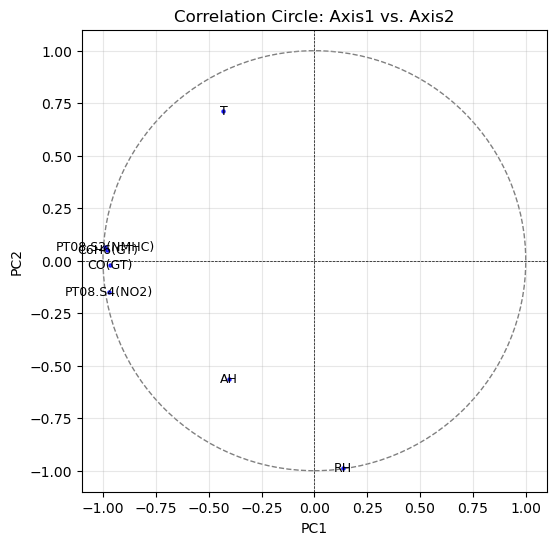

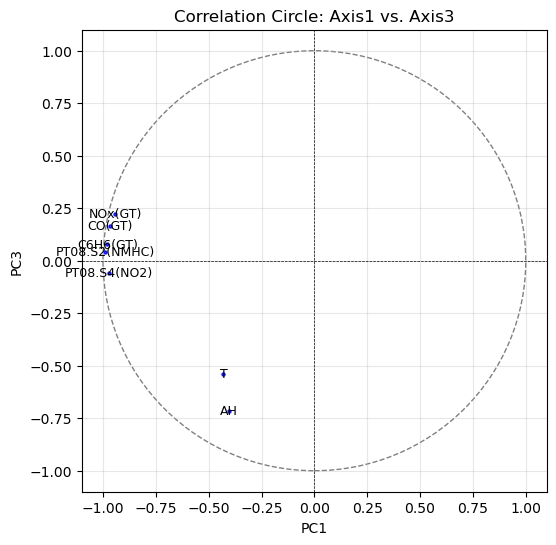

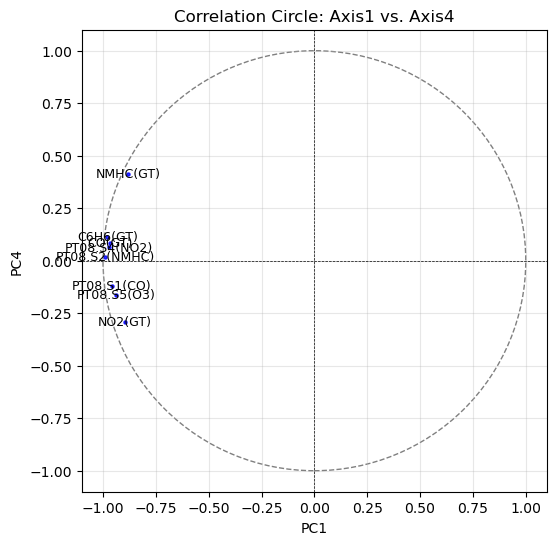

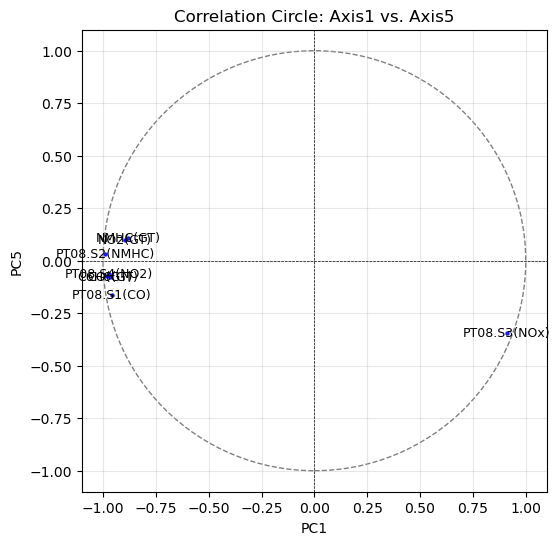

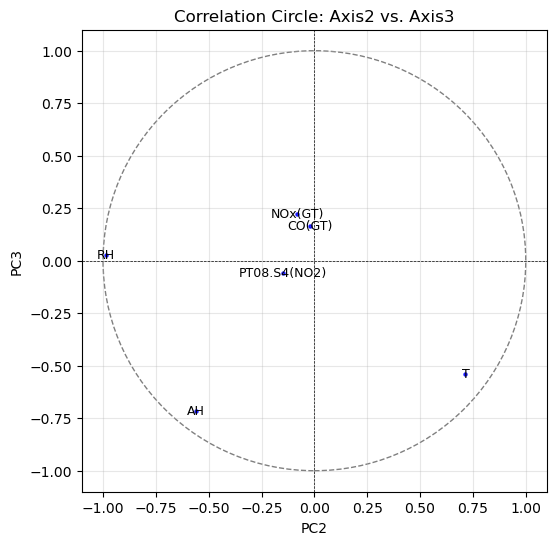

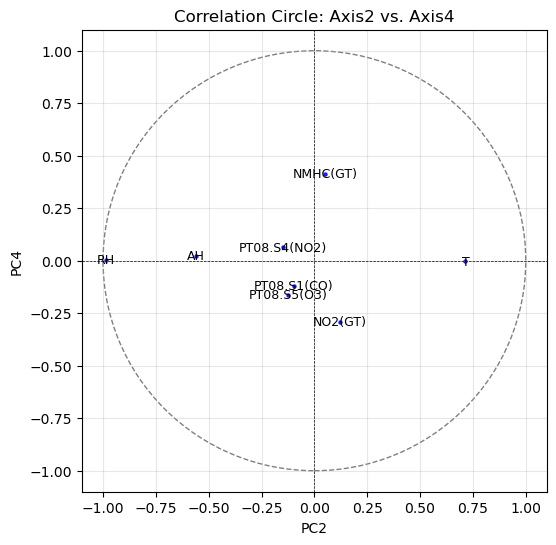

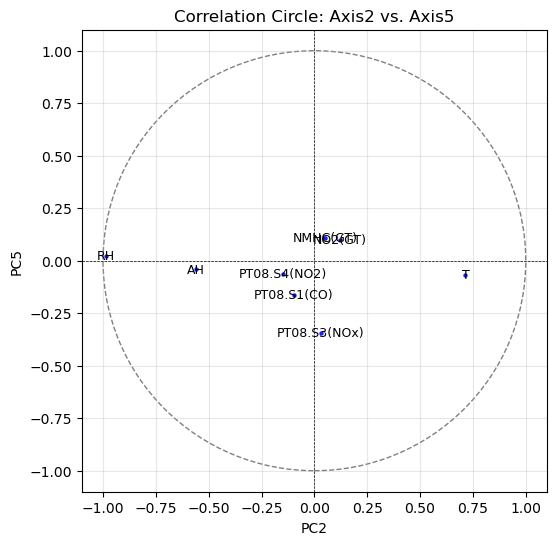

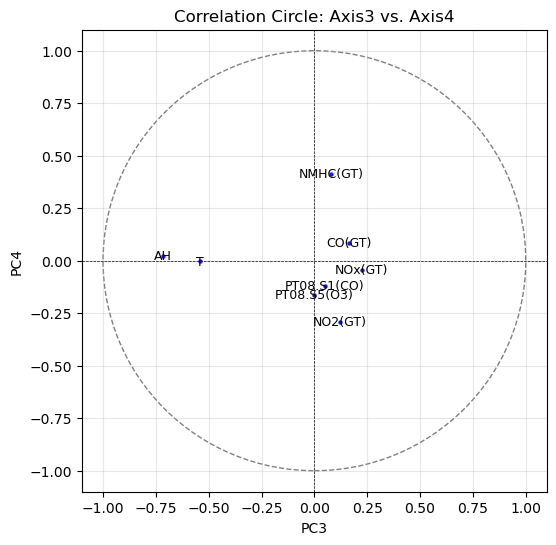

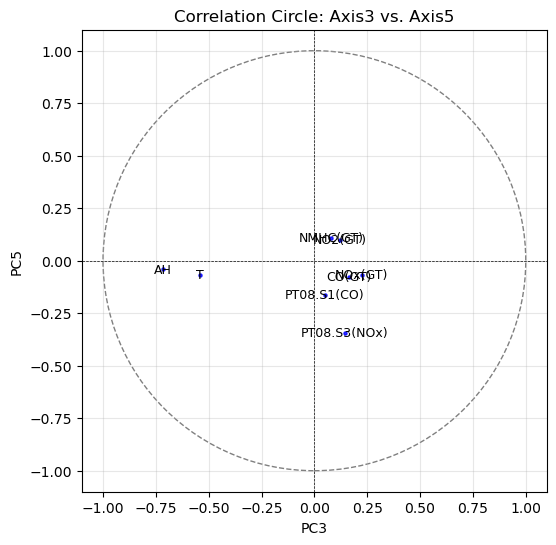

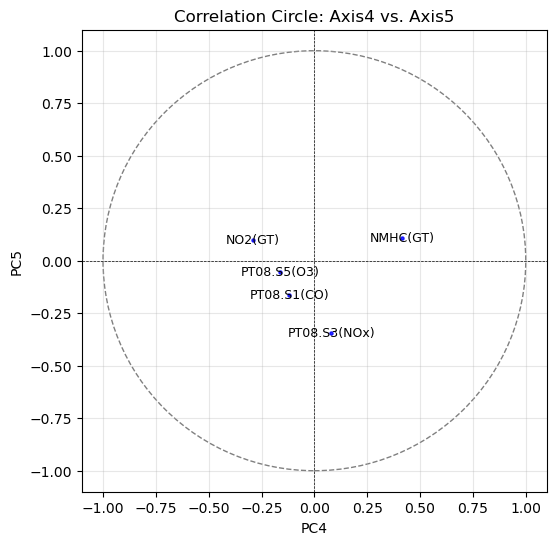

In [31]:
# Compute dynamic thresholds using the 70th percentile for each axis
dynamic_thresholds = []
percentile = 70
for i in range(S_chosen.shape[1]):
    threshold = np.percentile(np.abs(S_chosen[:, i]), percentile)  # Calculate the 70th percentile
    dynamic_thresholds.append(threshold)

# Print the thresholds for each principal component (formatted to 2 decimal points)
for i, threshold in enumerate(dynamic_thresholds):
    print(f"Threshold for PC{i+1} (70th Percentile): {threshold:.3f}")

# Plot correlation circles with dynamic thresholds (no arrows, only points)
n_components = S_chosen.shape[1]
for i in range(n_components):
    for j in range(i + 1, n_components):
        plt.figure(figsize=(6, 6))

        # Plot unit circle
        circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
        plt.gca().add_artist(circle)

        # Extract axes data
        x = S_chosen[:, i]
        y = S_chosen[:, j]

        # Use dynamic thresholds
        threshold_i = dynamic_thresholds[i]
        threshold_j = dynamic_thresholds[j]

        # Plot features meeting the threshold for both axes
        for k, (xi, yi) in enumerate(zip(x, y)):
            if abs(xi) >= threshold_i or abs(yi) >= threshold_j:  # Apply dynamic thresholds
                plt.scatter(xi, yi, color='blue', alpha=0.8, s=5)  # Plot points
                plt.text(xi, yi, S_df.index[k], fontsize=9, ha='center', va='center')  # Add labels

        # Formatting the plot
        plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
        plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
        plt.title(f'Correlation Circle: Axis{i+1} vs. Axis{j+1}')
        plt.xlabel(f'PC{i+1}')
        plt.ylabel(f'PC{j+1}')
        plt.xlim(-1.1, 1.1)
        plt.ylim(-1.1, 1.1)
        plt.grid(alpha=0.3)
        plt.show()


In [32]:
# Saturation matrix (as provided)
S_chosen_df = pd.DataFrame(S[:, :5], columns=[f"PC{i+1}" for i in range(5)], index=S_df.index)

# Updated thresholds (70th percentile for each PC)
thresholds = [0.962, 0.135, 0.153, 0.115, 0.087]

# Dictionary to store results
axis_definitions = {f"PC{i+1}": {"Positive": [], "Negative": []} for i in range(len(thresholds))}

# Iterate through the variables and saturation matrix
for variable, row in S_chosen_df.iterrows():
    # Find the PCs where the variable exceeds the threshold
    contributions = []
    for i, value in enumerate(row):
        if abs(value) > thresholds[i]:
            contributions.append((f"PC{i+1}", value))

    # Classify the variable
    if len(contributions) == 1:
        # If one axis dominates
        pc, value = contributions[0]
        if value > 0:
            axis_definitions[pc]["Positive"].append(variable)
        else:
            axis_definitions[pc]["Negative"].append(variable)
    elif len(contributions) > 1:
        # Assign to the axis with the highest contribution
        contributions = sorted(contributions, key=lambda x: abs(x[1]), reverse=True)
        pc, value = contributions[0]
        if value > 0:
            axis_definitions[pc]["Positive"].append(variable)
        else:
            axis_definitions[pc]["Negative"].append(variable)

# Display results
for pc, classification in axis_definitions.items():
    print(f"\n{pc}:")
    print(f"  Positive: {classification['Positive']}")
    print(f"  Negative: {classification['Negative']}")



PC1:
  Positive: []
  Negative: ['CO(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)']

PC2:
  Positive: ['T']
  Negative: ['RH']

PC3:
  Positive: ['NOx(GT)']
  Negative: ['AH']

PC4:
  Positive: ['NMHC(GT)']
  Negative: ['NO2(GT)', 'PT08.S5(O3)']

PC5:
  Positive: []
  Negative: ['PT08.S1(CO)', 'PT08.S3(NOx)']


## **Quality of Representation for Individuals**

In [33]:
# Matrix of new components for 5 chosen principal components
F_values = F_chosen_df.values  # Convert DataFrame to numpy array for computation

# Compute the Total Sum of Squares for each individual
total_sum_of_squares = np.sum(F_values**2, axis=1)  # Row-wise sum of squares

# Compute the Quality of Representation for each individual on each component
quality_matrix = (F_values**2) / total_sum_of_squares[:, np.newaxis]  # Element-wise division

# Convert to DataFrame for readability
quality_df = pd.DataFrame(quality_matrix, columns=[f"Quality_PC{i+1}" for i in range(F_values.shape[1])])

# Print the quality of representation for the individuals
print("\nQuality of Representation (for Individuals over 5 Factors):")
print(quality_df.head())  # Display only the first few rows for brevity
print("Shape of Quality Matrix:", quality_df.shape)


Quality of Representation (for Individuals over 5 Factors):
   Quality_PC1  Quality_PC2  Quality_PC3  Quality_PC4  Quality_PC5
0     0.177984     0.011662     0.333216     0.264810     0.212328
1     0.508439     0.002419     0.213085     0.040709     0.235347
2     0.076545     0.096304     0.313500     0.347859     0.165793
3     0.000631     0.282529     0.251391     0.393490     0.071959
4     0.320134     0.193490     0.118776     0.304129     0.063471
Shape of Quality Matrix: (827, 5)


In [34]:
print("\nQuality of Representation (for Individuals over 5 Factors):")
quality_df


Quality of Representation (for Individuals over 5 Factors):


,Quality_PC1,Quality_PC2,Quality_PC3,Quality_PC4,Quality_PC5
0,0.177984,0.011662,0.333216,0.264810,0.212328
1,0.508439,0.002419,0.213085,0.040709,0.235347
2,0.076545,0.096304,0.313500,0.347859,0.165793
3,0.000631,0.282529,0.251391,0.393490,0.071959
4,0.320134,0.193490,0.118776,0.304129,0.063471
...,...,...,...,...,...
822,0.768554,0.102917,0.123734,0.004052,0.000743
823,0.405447,0.245448,0.339923,0.007111,0.002071
824,0.335625,0.271178,0.384540,0.005428,0.003228
825,0.342831,0.293105,0.360768,0.001613,0.001683


## **Graphical Representation of Individuals in the Reduced Space**

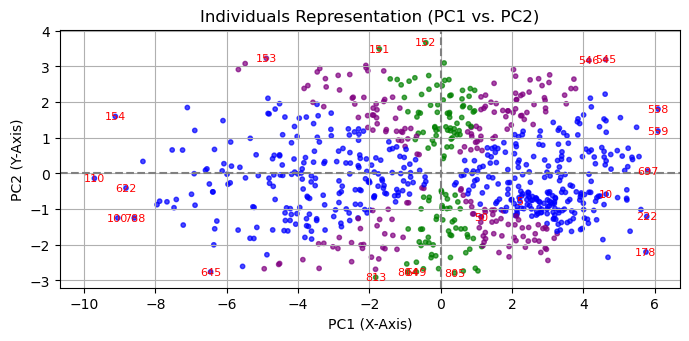

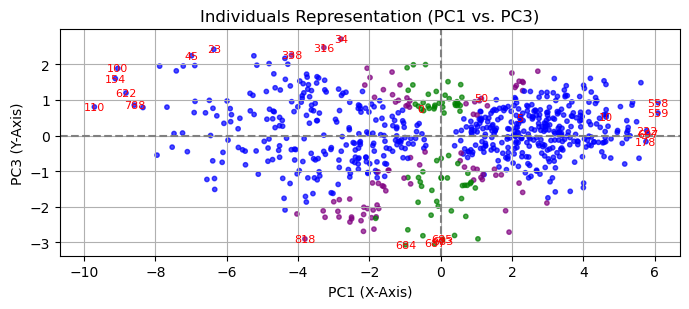

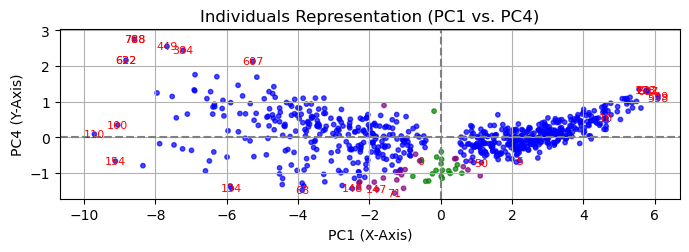

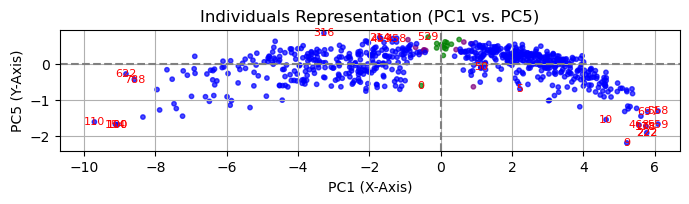

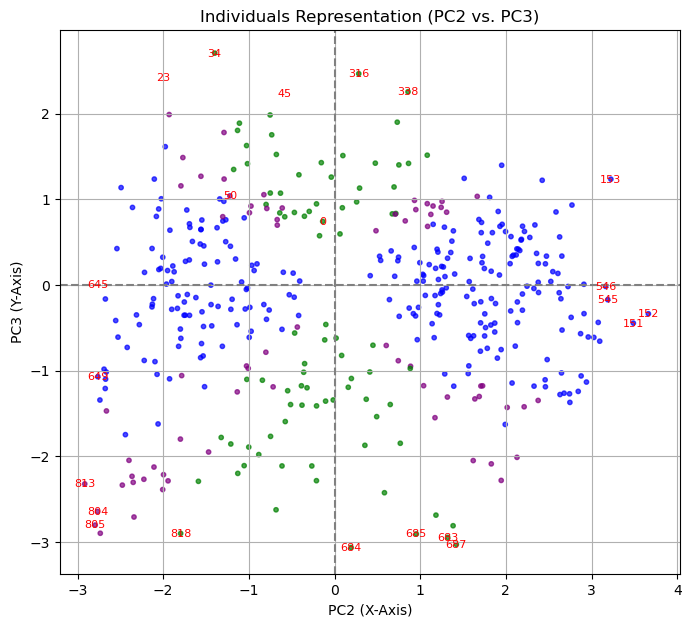

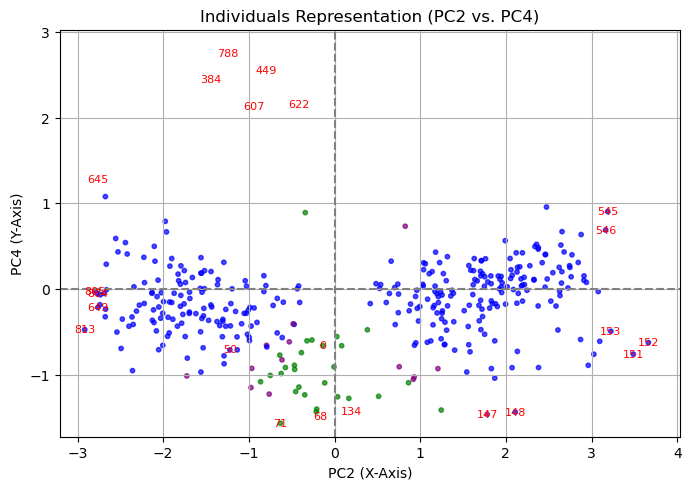

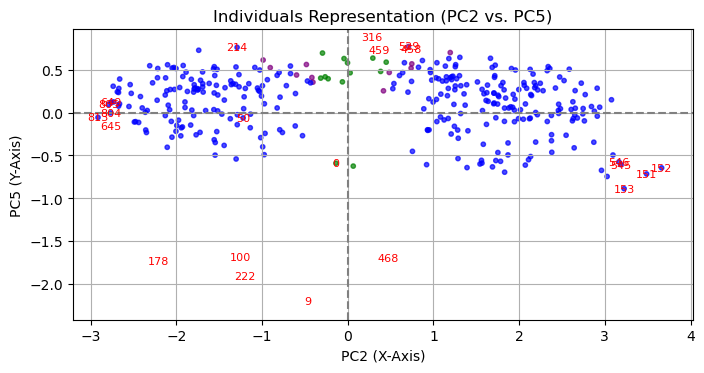

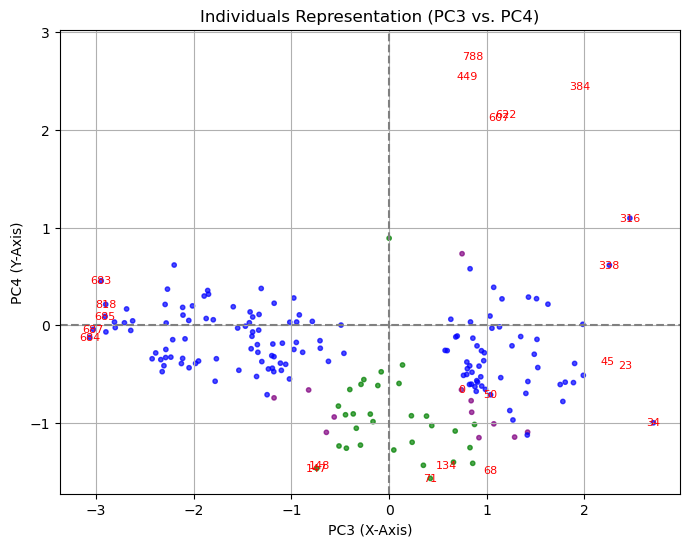

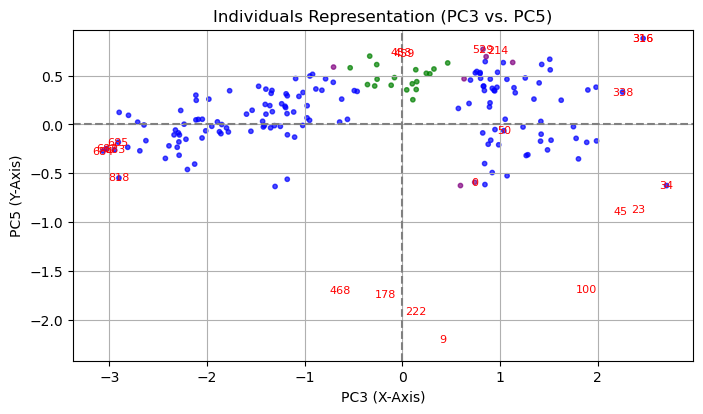

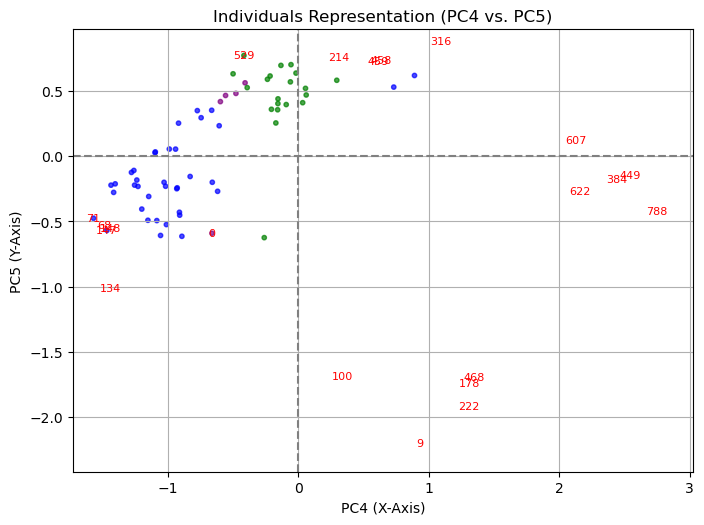

In [35]:
def plot_emphasized_individuals(F_df, quality_df, components, threshold=0.2, interesting_labels=[]):
    """
    Plot individuals for each pair of principal components,
    emphasizing 5 highest positive/negative individuals and labeling specific indices.

    Args:
    - F_df: DataFrame containing principal components.
    - quality_df: DataFrame containing quality of representation for individuals.
    - components: List of principal component indices to consider.
    - threshold: Quality threshold to filter individuals.
    - interesting_labels: List of specific individual indices to label.
    """
    # Reset indices for alignment
    F_df = F_df.reset_index(drop=True)
    quality_df = quality_df.reset_index(drop=True)

    num_components = len(components)
    for i in range(num_components):
        for j in range(i + 1, num_components):
            pc_x = components[i]  # Principal Component for x-axis
            pc_y = components[j]  # Principal Component for y-axis

            # Filter individuals based on quality threshold
            relevant_indices = (
                (quality_df[f"Quality_PC{pc_x}"] >= threshold) | (quality_df[f"Quality_PC{pc_y}"] >= threshold)
            )
            F_filtered = F_df.loc[relevant_indices]

            # Identify top 5 highest and lowest values for emphasis
            top5_pos_x = F_df[f"PC{pc_x}"].nlargest(5).index
            top5_neg_x = F_df[f"PC{pc_x}"].nsmallest(5).index
            top5_pos_y = F_df[f"PC{pc_y}"].nlargest(5).index
            top5_neg_y = F_df[f"PC{pc_y}"].nsmallest(5).index

            plt.figure(figsize=(8, 8))
            plt.axhline(0, color='grey', linestyle='--')
            plt.axvline(0, color='grey', linestyle='--')
            plt.gca().set_aspect('equal', 'box')

            # Color coding
            colors = ['purple' if (quality_df.loc[idx, f"Quality_PC{pc_x}"] >= threshold and
                                   quality_df.loc[idx, f"Quality_PC{pc_y}"] >= threshold)
                      else 'blue' if quality_df.loc[idx, f"Quality_PC{pc_x}"] >= threshold
                      else 'green' if quality_df.loc[idx, f"Quality_PC{pc_y}"] >= threshold
                      else 'lightgrey'
                      for idx in F_filtered.index]

            # Scatter plot
            plt.scatter(F_filtered[f"PC{pc_x}"], F_filtered[f"PC{pc_y}"], c=colors, alpha=0.7, s=10)

            # Annotate top 5 positive and negative individuals
            for idx in top5_pos_x.union(top5_neg_x):
                plt.text(F_df.loc[idx, f"PC{pc_x}"], F_df.loc[idx, f"PC{pc_y}"], str(idx),
                         fontsize=8, color='red', ha='center', va='center')
            for idx in top5_pos_y.union(top5_neg_y):
                plt.text(F_df.loc[idx, f"PC{pc_x}"], F_df.loc[idx, f"PC{pc_y}"], str(idx),
                         fontsize=8, color='red', ha='center', va='center')

            # Annotate interesting individuals
            for idx in interesting_labels:
                if idx in F_filtered.index:
                    plt.text(F_filtered.loc[idx, f"PC{pc_x}"], F_filtered.loc[idx, f"PC{pc_y}"],
                             str(idx), fontsize=8, color='red', ha='center', va='center')

            # Adjust x and y limits dynamically to include all points
            x_min, x_max = F_df[f"PC{pc_x}"].min(), F_df[f"PC{pc_x}"].max()
            y_min, y_max = F_df[f"PC{pc_y}"].min(), F_df[f"PC{pc_y}"].max()
            plt.xlim(x_min - 0.1 * abs(x_min), x_max + 0.1 * abs(x_max))
            plt.ylim(y_min - 0.1 * abs(y_min), y_max + 0.1 * abs(y_max))

            # Labels and limits
            plt.title(f"Individuals Representation (PC{pc_x} vs. PC{pc_y})")
            plt.xlabel(f"PC{pc_x} (X-Axis)")
            plt.ylabel(f"PC{pc_y} (Y-Axis)")
            plt.grid()
            plt.show()

# Example usage of the updated function
threshold = 0.2  # Quality threshold
interesting_labels = [0, 5, 10, 50]  # Indices of interesting individuals
chosen_components = [1, 2, 3, 4, 5]  # Principal components

# Call the function
plot_emphasized_individuals(F_chosen_df, quality_df, chosen_components, threshold, interesting_labels)
